In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
files.upload()

Saving stock.DAT to stock.DAT


{'stock.DAT': b'  0.000000  0.000000  0.000000  0.039473  -0.000000\r\n  0.027027  -0.044855  -0.003030  -0.014466  0.043478\r\n  0.122807  0.060773  0.088146  0.086238  0.078124\r\n  0.057031  0.029948  0.066808  0.013513  0.019512\r\n  0.063670  -0.003793  -0.039788  -0.018644  -0.024154\r\n  0.003521  0.050761  0.082873  0.074265  0.049504\r\n  -0.045614  -0.033007  0.002551  -0.009646  -0.028301\r\n  0.058823  0.041719  0.081425  -0.014610  0.014563\r\n  0.000000  -0.019417  0.002353  0.001647  -0.028708\r\n  0.006944  -0.025990  0.007042  -0.041118  -0.024630\r\n  0.010345  0.006353  0.083916  0.010291  -0.000000\r\n  -0.030717  0.020202  -0.040860  -0.039049  -0.050505\r\n  -0.003521  0.118812  0.089686  0.060070  0.021276\r\n  0.060071  0.079646  0.028807  0.036666  0.026041\r\n  -0.003333  -0.001025  0.028000  0.028938  -0.010152\r\n  0.055596  0.091282  0.042759  0.059375  -0.015812\r\n  0.051282  -0.007519  -0.041431  -0.016269  0.058510\r\n  -0.060976  -0.043561  0.023576  0

In [ ]:
stock = pd.read_csv('stock.DAT', header=None, delim_whitespace=True)
stock.columns = ['X1', 'X2', 'X3', 'X4', 'X5']
stock.corr()

,X1,X2,X3,X4,X5
X1,1.000000,0.576924,0.508656,0.386721,0.462178
X2,0.576924,1.000000,0.598384,0.389519,0.321953
X3,0.508656,0.598384,1.000000,0.436101,0.425627
X4,0.386721,0.389519,0.436101,1.000000,0.523529
X5,0.462178,0.321953,0.425627,0.523529,1.000000


# Q1 

How many factors are required to describe adequately the space in which these data actually fall?

In [ ]:
eigenValues, eigenVectors = np.linalg.eig(stock.corr())
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [ ]:
eigval = pd.DataFrame()
eigval['Eigenvalue'] = eigenValues
eigval['Proportion'] = eigval['Eigenvalue'] / len(eigval)
eigval['Cumulative'] = eigval['Proportion'].cumsum(axis=0)
eigval

,Eigenvalue,Proportion,Cumulative
0,2.856487,0.571297,0.571297
1,0.809118,0.161824,0.733121
2,0.540044,0.108009,0.841130
3,0.451347,0.090269,0.931399
4,0.343004,0.068601,1.000000


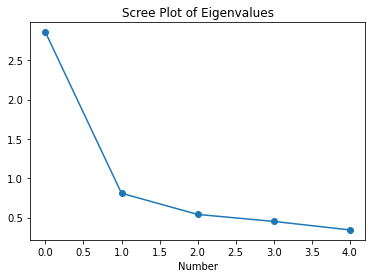

In [ ]:
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Number')
plt.plot(eigenValues, 'o-')
plt.show()

# Q2 

Compute the communality of each variable.


$\Sigma = LL' + \psi$

$ =  \begin{bmatrix}
e_1 & e_2 & \dots & e_p \\
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & \dots & 0\\
0 & \lambda_2 & \dots & 0\\
0 & 0 & \dots & \lambda_p\\
\end{bmatrix}
\begin{bmatrix}
e_1 \\
e_2 \\
\dots \\
e_p \\
\end{bmatrix}$

$\approx
\begin{bmatrix}
e_1 & \dots & e_m \\
\end{bmatrix}
\begin{bmatrix}
\lambda_1  & \dots & 0\\
0 & \dots & \lambda_m\\
\end{bmatrix}
\begin{bmatrix}
e_1 \\
\dots \\
e_m \\
\end{bmatrix}
$

$ = \begin{bmatrix}
\sqrt{\lambda_1}e_1 & \dots & \sqrt{\lambda_m}e_m \\
\end{bmatrix}
\begin{bmatrix}
\sqrt{\lambda_1}e_1 \\
\dots \\
\sqrt{\lambda_m}e_m \\
\end{bmatrix}
= \hat{L}\hat{L}'$

In [ ]:
loadings2 = pd.DataFrame()
loadings2['Factor1'] = np.sqrt(eigenValues[0])*eigenVectors[:,0]
loadings2['Factor2'] = np.sqrt(eigenValues[1])*eigenVectors[:,1]
loadings2.index = stock.columns
np.round(loadings2, 2)

,Factor1,Factor2
X1,0.78,0.22
X2,0.77,0.46
X3,0.79,0.23
X4,0.71,-0.47
X5,0.71,-0.52


$Var(X_i) = l_{i1}^2 + l_{i2}^2  + \dots + l_{im}^2 + \psi_i$

Total Variation = communality + specific Variance



In [ ]:
np.dot(loadings2, np.transpose(loadings2))

array([[0.66070874, 0.70442501, 0.67308021, 0.45597996, 0.44441591],
       [0.70442501, 0.80648316, 0.72095935, 0.3341872 , 0.31026298],
       [0.67308021, 0.72095935, 0.68588504, 0.45535266, 0.44287274],
       [0.45597996, 0.3341872 , 0.45535266, 0.7311545 , 0.75495071],
       [0.44441591, 0.31026298, 0.44287274, 0.75495071, 0.78137395]])

# Q3

Compute the 2 x 2 matrix to rotate the Xi's 45 degrees anti-clockwise. Fill in a11, a12, a21, a22 on the following code.



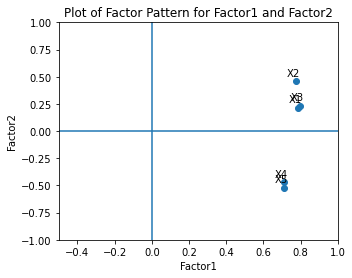

In [ ]:
# Preplot(Before Rotation)
x = loadings2.Factor1 ; y = loadings2.Factor2
plt.figure(figsize = (5,4))
plt.title('Plot of Factor Pattern for Factor1 and Factor2')
plt.xlabel('Factor1') ; plt.ylabel('Factor2')
plt.scatter(x,y)
for i in range(len(loadings2)):
    plt.text(x[i]-0.05, y[i]+0.05, loadings2.index[i])
plt.axvline(x = 0) ; plt.axhline(y = 0) 
plt.xlim(-0.5,1); plt.ylim(-1,1)
plt.show()

2 x 2 rotation matrix

$ \begin{bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta)
\end{bmatrix}$

In [ ]:
theta = np.pi / 4
a11 = np.cos(theta)
a12 = -np.sin(theta)
a21 = np.sin(theta)
a22 = np.cos(theta)

A = pd.DataFrame([[a11, a12], [a21, a22]],columns=('Factor1','Factor2'))
loadings_rotation = A.dot(loadings2.transpose()).transpose()
loadings_rotation.columns = ('Factor1','Factor2')
loadings_rotation

,Factor1,Factor2
X1,0.400781,0.707166
X2,0.222435,0.870061
X3,0.395929,0.727410
X4,0.838037,0.169848
X5,0.873861,0.133192


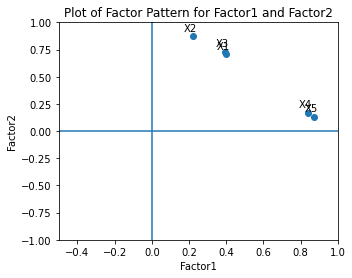

In [ ]:
# Plot(After Rotation)
x = loadings_rotation.Factor1 ; y = loadings_rotation.Factor2
plt.figure(figsize = (5,4))
plt.title('Plot of Factor Pattern for Factor1 and Factor2')
plt.xlabel('Factor1') ; plt.ylabel('Factor2')
plt.scatter(x,y)
for i in range(len(loadings_rotation)):
    plt.text(x[i]-0.05, y[i]+0.05, loadings_rotation.index[i])
plt.axvline(x = 0) ; plt.axhline(y = 0) 
plt.xlim(-0.5,1); plt.ylim(-1,1)
plt.show()